In [ ]:
# House Prices: Advanced Regression Techniques

## Summary
This project aims to predict the final price of each home in the dataset using advanced regression techniques. The dataset contains various features related to the properties of the houses, such as the number of rooms, year built, and other attributes. The goal is to build a model that can accurately predict house prices based on these features.

## Index
1. **Introduction**
    - Overview of the project
    - Description of the dataset
2. **Data Preprocessing**
    - Handling missing values
    - Encoding categorical variables
    - Feature scaling
3. **Exploratory Data Analysis (EDA)**
    - Summary statistics
    - Visualizations
4. **Feature Selection**
    - Univariate feature selection
    - Tree-based feature selection
5. **Model Building**
    - Splitting the data into training and validation sets
    - Training the model
    - Evaluating the model
6. **Model Evaluation**
    - Performance metrics
    - Cross-validation
7. **Prediction on Test Data**
    - Preprocessing test data
    - Making predictions
    - Saving the results
8. **Conclusion**
    - Summary of findings
    - Future work

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load training and test datasets
train = pd.read_csv('homedata/train.csv')
test = pd.read_csv('homedata/test.csv')



In [5]:
# Print the unique data types in the training dataset
print(train.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [6]:

# Select numerical and categorical columns from the training dataset
num_col = train.select_dtypes(exclude='object')
cat_col = train.select_dtypes(exclude=['int64', 'float64'])

# Display summary statistics for numerical columns
num_col.describe(include='all')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

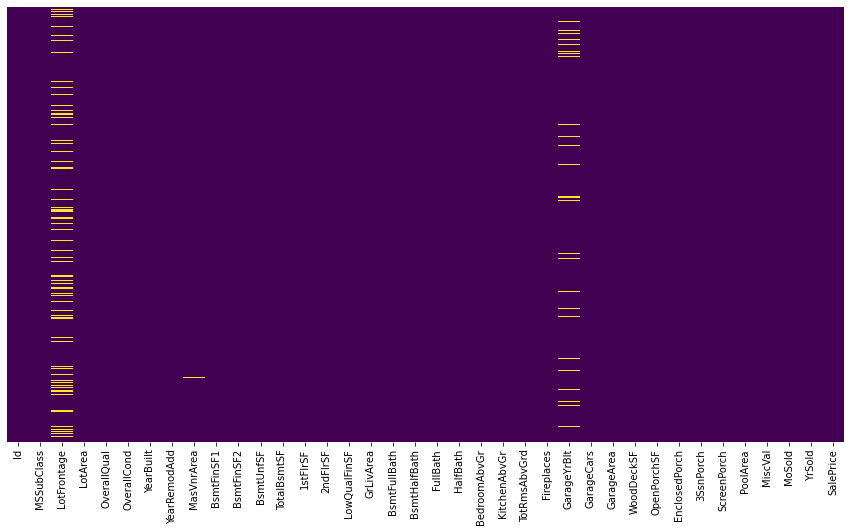

In [7]:
# Plot heatmap of missing values in numerical columns
plt.figure(figsize=(15,8))
sns.heatmap(num_col.isnull(), yticklabels=0,  cbar=False, cmap='viridis')

In [ ]:
# Copy numerical columns to X and separate target variable y
X = num_col.copy()
y = X.pop('SalePrice')
X.isnull().sum()

<AxesSubplot:>

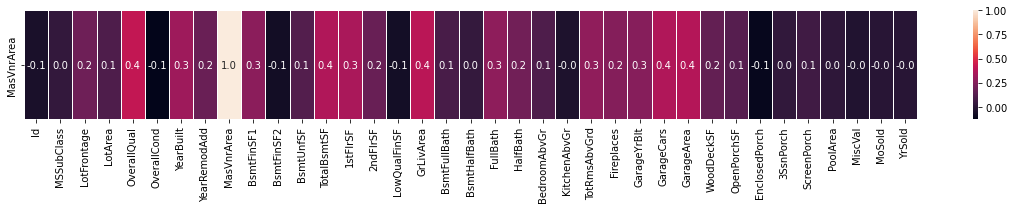

In [9]:
# Display the number of missing values in each column of X
f, ax=plt.subplots(figsize=(20,2))
sns.heatmap(X.corr().iloc[8:9,:], annot=True, linewidths=.8, fmt='.1f', ax=ax)

In [ ]:
# Plot kernel density estimate for 'MasVnrArea' column
sns.kdeplot(X.MasVnrArea,Label='MasVnrArea',color='g')

In [11]:
# Replace missing values in 'MasVnrArea' column with 0
X.MasVnrArea.replace(np.nan,0,inplace=True)

<AxesSubplot:>

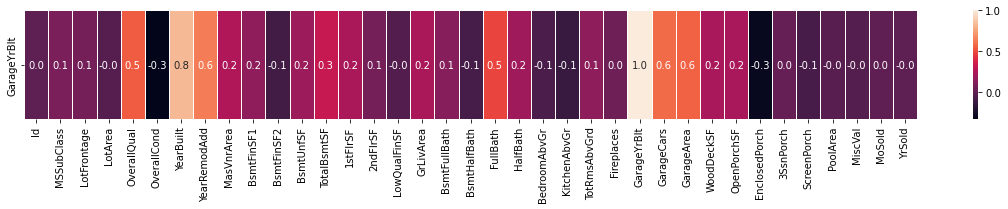

In [12]:
# Plot heatmap of correlations for another specific row in X
plt.figure(figsize=(20,2))
sns.heatmap(X.corr().iloc[25:26,:], annot=True, linewidths=.8, fmt='.1f')

In [ ]:
# Fill missing values in 'GarageYrBlt' column with values from 'YearBuilt' column
X.GarageYrBlt.fillna(X.YearBuilt, inplace=True)
X[['GarageYrBlt','YearBuilt']]


<AxesSubplot:>

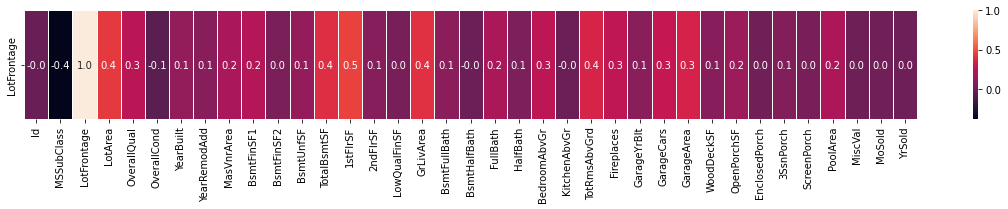

In [14]:
# Plot heatmap of correlations for another specific row in X
plt.figure(figsize=(20,2))
sns.heatmap(X.corr().iloc[2:3,:], annot=True, linewidths=.8, fmt='.1f')

In [15]:
# Replace missing values in 'LotFrontage' column with the mean value
X.LotFrontage.replace(np.nan, X.LotFrontage.mean(), inplace=True)

In [17]:
# Import feature selection modules from sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [18]:
# Select top 30 features using chi-squared test
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X,y)
# Create a DataFrame with feature scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featurescores = pd.concat([dfcolumns,dfscores], axis=1)
featurescores.columns = ['Feature', 'Score']
featurescores.sort_values(by='Score', ascending=False)


,Feature,Score
3,LotArea,1.011497e+07
34,MiscVal,6.253332e+06
14,2ndFlrSF,4.648841e+05
9,BsmtFinSF1,3.999851e+05
33,PoolArea,3.835642e+05
10,BsmtFinSF2,3.688827e+05
8,MasVnrArea,2.880241e+05
11,BsmtUnfSF,2.747512e+05
15,LowQualFinSF,2.448810e+05
16,GrLivArea,1.968501e+05


<AxesSubplot:>

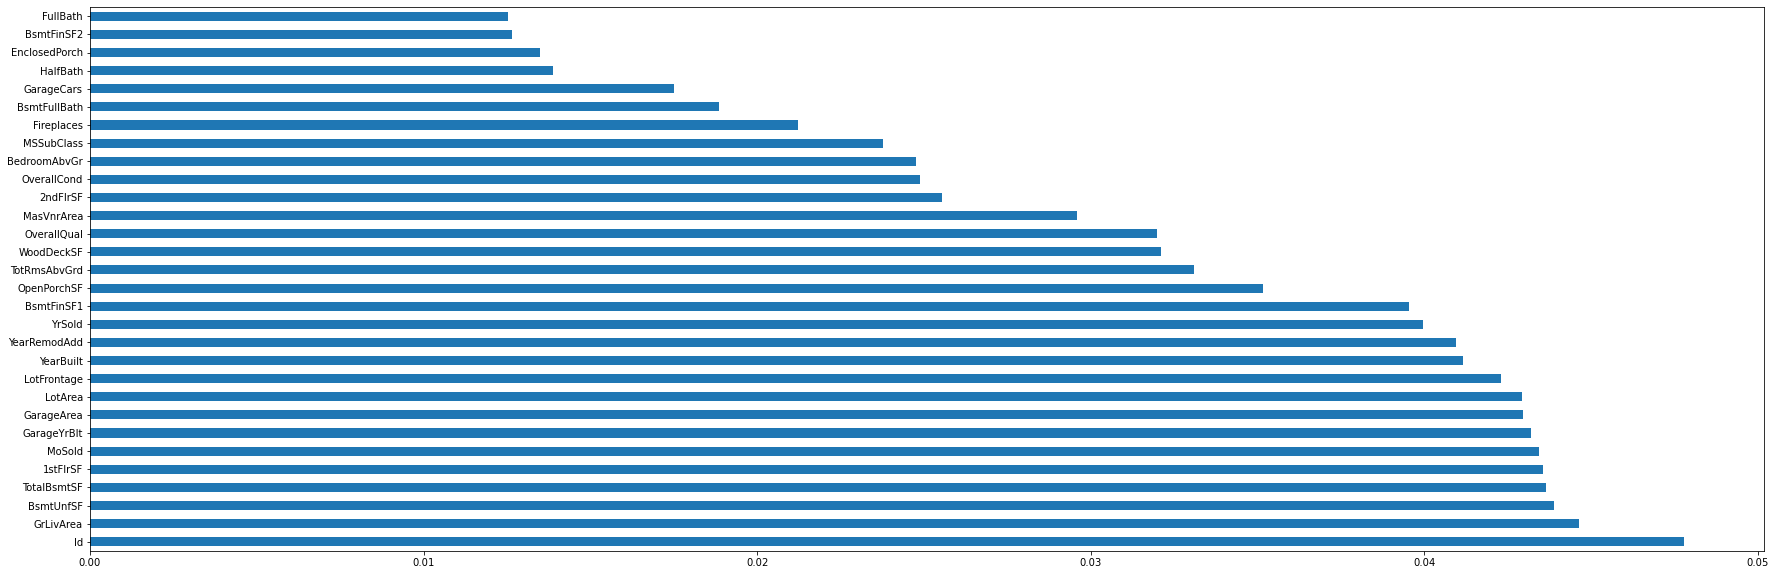

In [19]:
# Import ExtraTreesClassifier from sklearn
from sklearn.ensemble import ExtraTreesClassifier

# Fit ExtraTreesClassifier model and plot feature importances
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(30).plot(kind='barh', figsize=(30,10))


In [ ]:


# Create a union of top features from both methods and remove 'Id' column
feats_tree = set(list(feat_importance.nlargest(30).index))
feats_chi = set(list(featurescores.Feature[:30]))
union_feat = feats_tree.union(feats_chi)
union_feat.remove('Id')
X = X[union_feat]
X.info()


In [ ]:
# Import necessary modules for model training and evaluation
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.model_selection import train_test_split as tt 
from sklearn.ensemble import RandomForestRegressor as rr 

# Split the data into training and validation sets
train_X, val_X, train_Y, val_Y = tt(X, y, random_state=23)

# Train RandomForestRegressor model and make predictions
forest_model = rr(random_state=12, max_depth=9, n_estimators=200)
forest_model.fit(X,y)
prediction = forest_model.predict(val_X)

# Calculate mean absolute error of the predictions
mae(val_Y,prediction)

In [ ]:
# Select numerical columns from the test dataset
test_X = test.select_dtypes(exclude=['object'])

# Display the number of missing values in each column of test_X
X = num_col.copy()
test_X.isnull().sum()

In [ ]:
# Replace missing values in specific columns of test_X
test_X.LotFrontage.replace(np.nan, test_X.LotFrontage.mean(), inplace=True)
test_X.MasVnrArea.replace(np.nan, test_X.MasVnrArea.mean(), inplace=True)
test_X.GarageYrBlt.fillna(X.YearBuilt, inplace=True)


        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
count  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean    439.142906    52.583276   554.230295  1046.078136      0.433859   
std     455.117812   176.698671   437.117479   442.749327      0.530527   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000   219.500000   784.000000      0.000000   
50%     350.500000     0.000000   460.000000   988.000000      0.000000   
75%     752.000000     0.000000   797.500000  1304.000000      1.000000   
max    4010.000000  1526.000000  2140.000000  5095.000000      3.000000   

       BsmtHalfBath   GarageCars   GarageArea  
count   1459.000000  1459.000000  1459.000000  
mean       0.065113     1.766278   472.773818  
std        0.252307     0.775703   216.974247  
min        0.000000     0.000000     0.000000  
25%        0.000000     1.000000   318.000000  
50%        0.000000     2.000000   4

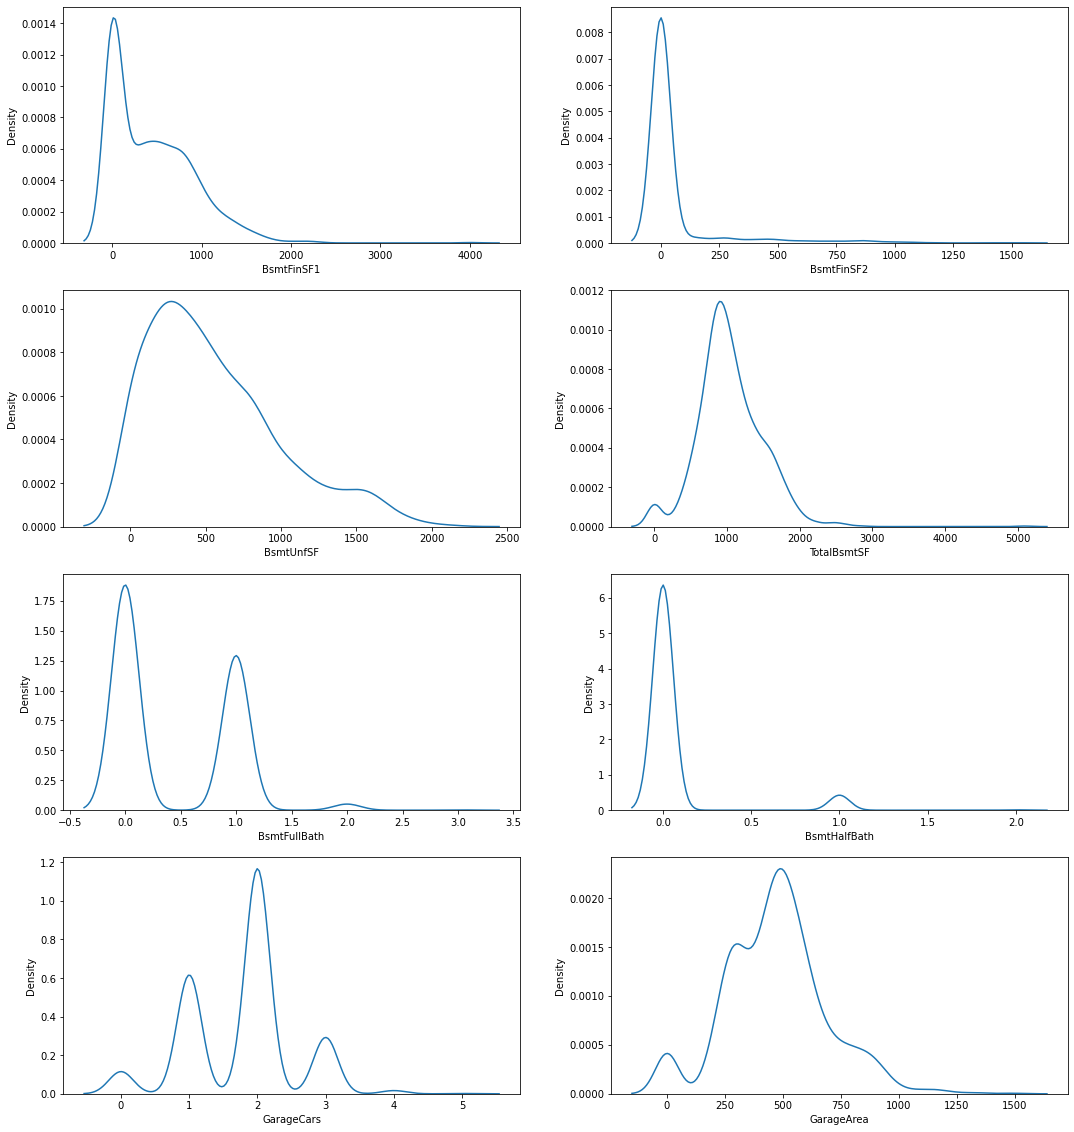

In [59]:
# Define columns to plot and display their summary statistics
plot_these = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

print(test_X[plot_these].describe())

# Plot kernel density estimates for specified columns
plt.figure(figsize=(18,20))
for indexo, item in enumerate(plot_these):
    plt.subplot(4,2,indexo + 1)
    sns.kdeplot(test_X[item])

In [ ]:
# Replace missing values in specified columns with median values
for item in plot_these:
    test_X[item].replace(np.nan, test_X[item].median(), inplace=True)

In [ ]:
test_X.isnull().sum()

In [63]:
# Make predictions on the test dataset using the trained model
test_pred = forest_model.predict(test_X[union_feat])
test_pred 

array([127769.9652084 , 152519.27535613, 180250.37722607, ...,
       158790.23793575, 114507.79866706, 234350.10459334])

In [65]:
# Create a DataFrame with the test predictions and save to CSV
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': test_pred})
output.to_csv('submission_numeric_20.csv', index=False)